# Package Install and function define

In [1]:
!pip install Geomloss
!pip install POT

  Preparing metadata (setup.py) ... done
  Created wheel for Geomloss: filename=geomloss-0.2.6-py3-none-any.whl size=32246 sha256=951599f23f1ed1511c53a1140ea928a834c1b339081dfc8c44c1a34c82f55f3a
  Stored in directory: /root/.cache/pip/wheels/0d/c9/80/4387eb03aa215ae557869d6fe8be498fd3d3cf297db2357b67
Successfully built Geomloss
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.4/835.4 kB 50.0 MB/s eta 0:00:00


In [2]:
import sys
import matplotlib.pyplot as plt
import importlib
import evals
import os
import importlib
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.preprocessing import KernelCenterer
import evals
import numpy as np
import torch
import torch.optim as optim
from sklearn.decomposition import KernelPCA
from geomloss import SamplesLoss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from google.colab import drive
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import KernelPCA
import numpy as np
from scipy.spatial.distance import cdist
import random


In [ ]:
def zscore_normalization(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data
def visualize_by_domain(mapped_K1, mapped_K2):
    """
    Visualize the data using PCA, color-coded by domain.

    Parameters:
        mapped_K1 (np.ndarray): Mapped kernel matrix for domain X.
        mapped_K2 (np.ndarray): Mapped kernel matrix for domain Y.
    """
    pca = PCA(n_components=2)
    combined_data = np.vstack([mapped_K1, mapped_K2])
    domain_labels = np.array(['X'] * len(mapped_K1) + ['Y'] * len(mapped_K2))

    # Perform PCA
    pca_result = pca.fit_transform(combined_data)

    # Plotting
    plt.figure(figsize=(6, 4))
    for i, label in enumerate(np.unique(domain_labels)):
        idx = domain_labels == label
        plt.scatter(pca_result[idx, 0], pca_result[idx, 1], label=f'Domain {label}', alpha=0.75, edgecolors='w')
    plt.title('PCA Visualization by Domain')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()
def visualize_by_cell_type(mapped_K1, mapped_K2, cellTypes_X, cellTypes_y):
    """
    Visualize the data using PCA, color-coded by cell type using discrete categories.

    Parameters:
        mapped_K1 (np.ndarray): Mapped kernel matrix for domain X.
        mapped_K2 (np.ndarray): Mapped kernel matrix for domain Y.
        cellTypes_X (np.ndarray): Cell types for domain X.
        cellTypes_y (np.ndarray): Cell types for domain Y.
    """
    pca = PCA(n_components=2)
    combined_data = np.vstack([mapped_K1, mapped_K2])
    combined_labels = np.concatenate([cellTypes_X, cellTypes_y])

    # Find unique labels and assign colors

    # Perform PCA
    pca_result = pca.fit_transform(combined_data)
    unique_cell_types = np.unique(combined_labels)
    # Plotting
    for cell_type in unique_cell_types:
        indices = np.where(combined_labels == cell_type)[0]
        plt.scatter(pca_result[indices, 0], pca_result[indices, 1], alpha=0.7, label=f'Cell Type {int(cell_type)}')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Map of Kernel Matrix by Cell Type')
    plt.legend()
    plt.show()
def visualize_by_cell_type_1(mapped_K1, mapped_K2, cellTypes_X, cellTypes_y):
    """
    Visualize the data using PCA, color-coded by cell type using discrete categories.

    Parameters:
        mapped_K1 (np.ndarray): Mapped kernel matrix for domain X.
        mapped_K2 (np.ndarray): Mapped kernel matrix for domain Y.
        cellTypes_X (np.ndarray): Cell types for domain X.
        cellTypes_y (np.ndarray): Cell types for domain Y.
    """
    pca = PCA(n_components=2)
    combined_data = np.vstack([mapped_K1, mapped_K2])
    combined_labels = np.concatenate([cellTypes_X, cellTypes_y])

    # Find unique labels and assign colors

    # Perform PCA
    pca_result = pca.fit_transform(combined_data)
    unique_cell_types = np.unique(combined_labels)
    # Plotting
    for cell_type in unique_cell_types:
        indices = np.where(combined_labels == cell_type)[0]
        plt.scatter(pca_result[indices, 0], pca_result[indices, 1], alpha=0.7, label=f'Cell Type {(cell_type)}')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Map of Kernel Matrix by Cell Type')
    plt.legend()
    plt.show()

def plot_pca_map(kernel_matrix, cell_types):
    # Perform PCA on the kernel matrix
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(kernel_matrix)

    # Plot the first two principal components with colors based on cell types
    plt.figure(figsize=(8, 6))
    unique_cell_types = np.unique(cell_types)
    for cell_type in unique_cell_types:
        indices = np.where(cell_types == cell_type)[0]
        plt.scatter(pca_result[indices, 0], pca_result[indices, 1], alpha=0.7, label=f'Cell Type {int(cell_type)}')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Map of Kernel Matrix by Cell Type')
    plt.legend()
    plt.show()

def plot_pca_map_1(kernel_matrix, cell_types):
    # Perform PCA on the kernel matrix
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(kernel_matrix)

    # Plot the first two principal components with colors based on cell types
    plt.figure(figsize=(8, 6))
    unique_cell_types = np.unique(cell_types)
    for cell_type in unique_cell_types:
        indices = np.where(cell_types == cell_type)[0]
        plt.scatter(pca_result[indices, 0], pca_result[indices, 1], alpha=0.7, label=f'Cell Type {(cell_type)}')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Map of Kernel Matrix by Cell Type')
    plt.legend()
    plt.show()

def generate_weight_matrix(S, p):
    n = S.shape[0]
    W = torch.zeros_like(S)

    # For each row in the similarity matrix, find the indices of the p nearest neighbors (highest similarities)
    for i in range(n):
        # Get indices of the p largest similarities (excluding the diagonal)
        nearest_indices = torch.argsort(S[i, :], descending=True)[:p+1]  # +1 because the largest will be itself
        W[i, nearest_indices] = 1

    # Make W symmetric
    W = torch.max(W, W.T)

    return W

def set_seed(seed: int = 42) -> None:
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

def generate_laplacian_matrix(W):
    # Degree matrix D
    D = torch.diag(W.sum(dim=1))

    # Laplacian matrix L
    L = D - W

    return L
def plot_pca_map(kernel_matrix, cell_types):
    # Perform PCA on the kernel matrix
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(kernel_matrix)

    # Plot the first two principal components with colors based on cell types
    plt.figure(figsize=(8, 6))
    unique_cell_types = np.unique(cell_types)
    for cell_type in unique_cell_types:
        indices = np.where(cell_types == cell_type)[0]
        plt.scatter(pca_result[indices, 0], pca_result[indices, 1], alpha=0.7, label=f'Cell Type {int(cell_type)}')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Map of Kernel Matrix by Cell Type')
    plt.legend()
    plt.show()
def transfer_accuracy(domain1, domain2, type1, type2, n):
	"""
	Metric from UnionCom: "Label Transfer Accuracy"
	"""
	knn = KNeighborsClassifier(n_neighbors=n)
	knn.fit(domain2, type2)
	type1_predict = knn.predict(domain1)
	# np.savetxt("type1_predict.txt", type1_predict)
	count = 0
	for label1, label2 in zip(type1_predict, type1):
		if label1 == label2:
			count += 1
	return count / len(type1)

def rbf_kernel(X, gamma=None):

    pairwise_sq_dists = cdist(X, X, 'sqeuclidean')
    return np.exp(-gamma * pairwise_sq_dists)

def calculate_gamma(data_normalized):
    # Calculate the pairwise Euclidean distances
    dists = euclidean_distances(data_normalized, data_normalized)

    # Calculate the median of the distances
    median_dist = np.median(dists)

    # Calculate and return gamma
    gamma = 1 / (2 * median_dist ** 2)
    return gamma

In [ ]:
def initialize_vecotr(K, p, device):

    # Perform Kernel PCA
    pca = KernelPCA(n_components=p, kernel='precomputed')
    transformed = pca.fit_transform(K.cpu())
    eigenvectors_ = pca.eigenvectors_
    eigenvalues_ = pca.eigenvalues_

    # Filter non-zero eigenvalues for stability
    non_zeros = np.flatnonzero(eigenvalues_)
    scaled_eigenvectors = np.zeros_like(eigenvectors_)

    # Scale eigenvectors by the inverse square root of the eigenvalues
    if non_zeros.size > 0:
        scaled_eigenvectors[:, non_zeros] = eigenvectors_[:, non_zeros] / np.sqrt(eigenvalues_[non_zeros])

    # Convert to torch parameter and move to the specified device
    scaled_eigenvectors = torch.nn.Parameter(torch.tensor(scaled_eigenvectors, dtype=torch.float32).to(device))

    return scaled_eigenvectors

def optimize_alignment(K1, K2, cellTypes_X, cellTypes_y, device, p=5, knn=10 ,lambda_topo_values=[0.1], lambda_reg_values=[0.01],iterations=2000,lr_rate=0.001):
    best_accuracy = 0
    best_params = {}

    for lambda_topo in lambda_topo_values:
        for lambda_reg in lambda_reg_values:
                print(f"Starting optimization with p: {p}, lambda_topo: {lambda_topo}, lambda_reg: {lambda_reg}")
                set_seed(50)  # Ensure reproducibility

                # PCA transformation for K2
                beta = initialize_vecotr(K2, p, device)
                # PCA transformation for K1
                alpha = initialize_vecotr(K1, p, device)
                # Initialize optimizers and schedulers
                optimizer_alpha = optim.Adam([alpha], lr=lr_rate)
                optimizer_beta = optim.Adam([beta], lr=lr_rate)
                scheduler_alpha = optim.lr_scheduler.ReduceLROnPlateau(optimizer_alpha, mode='min', factor=0.5, patience=10)
                scheduler_beta = optim.lr_scheduler.ReduceLROnPlateau(optimizer_beta, mode='min', factor=0.5, patience=10)

                # Loss function
                ot_loss_function = SamplesLoss(loss="sinkhorn", p=2, blur=0.0000001, scaling=0.9).to(device)

                for m in range(iterations+1):
                    optimizer_alpha.zero_grad()
                    optimizer_beta.zero_grad()

                    mapped_K1 = torch.matmul(K1, alpha)
                    mapped_K2 = torch.matmul(K2, beta)
                    ot_loss = ot_loss_function(mapped_K1, mapped_K2)

                    penalty_part_alpha = torch.norm(alpha.T @ K1 @ alpha - torch.eye(p, device=device), p='fro')**2
                    penalty_part_beta = torch.norm(beta.T @ K2 @ beta - torch.eye(p, device=device), p='fro')**2
                    penalty_part = penalty_part_alpha + penalty_part_beta

                    W_1 = generate_weight_matrix(K1, p=knn)
                    L_1 = generate_laplacian_matrix(W_1)
                    W_2 = generate_weight_matrix(K2, p=knn)
                    L_2 = generate_laplacian_matrix(W_2)

                    graph_reg_alpha = torch.trace(torch.matmul(mapped_K1.T, torch.matmul(L_1, mapped_K1)))
                    graph_reg_beta = torch.trace(torch.matmul(mapped_K2.T, torch.matmul(L_2, mapped_K2)))

                    total_loss = ot_loss + lambda_topo * penalty_part + lambda_reg * (graph_reg_alpha + graph_reg_beta)

                    total_loss.backward()
                    optimizer_alpha.step()
                    optimizer_beta.step()

                    scheduler_alpha.step(total_loss)
                    scheduler_beta.step(total_loss)
                    current_lr_a = optimizer_alpha.param_groups[0]['lr']
                    current_lr_b = optimizer_beta.param_groups[0]['lr']

                    # Breaking conditions based on the training progress
                    if m == iterations:
                        mapped_K1_numpy = mapped_K1.detach().cpu().numpy()
                        mapped_K2_numpy = mapped_K2.detach().cpu().numpy()
                        accuracy = transfer_accuracy(mapped_K1_numpy, mapped_K2_numpy, cellTypes_X, cellTypes_y, 5)
                        fracs = evals.calc_domainAveraged_FOSCTTM(mapped_K1_numpy, mapped_K2_numpy)
                        print(f"Step: {m}, Loss: {total_loss.item()}, Learning Rate _ a: {current_lr_a},Learning Rate _ b: {current_lr_b}")
                        print("Average FOSCTTM score for this alignment with X onto Y is: ",np.mean(fracs))
                        print(f"Label Transfer Accuracy: {accuracy}")
                        print("OT Loss:", ot_loss.item())
                        print("Graph Loss:", (graph_reg_beta+graph_reg_alpha).item())
                        print("Orthogonal Loss:", (penalty_part_beta+penalty_part_alpha).item())

                        print()
                        print()

    return mapped_K1_numpy,mapped_K2_numpy,accuracy,np.mean(fracs)


# SC-Gem Dataset

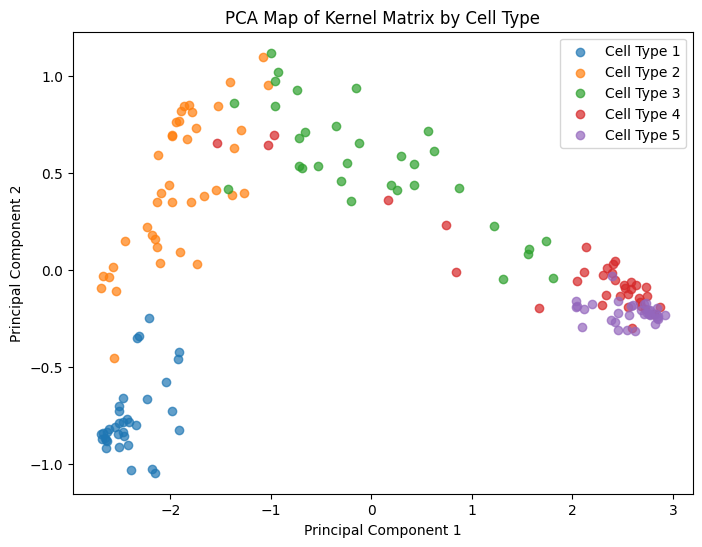

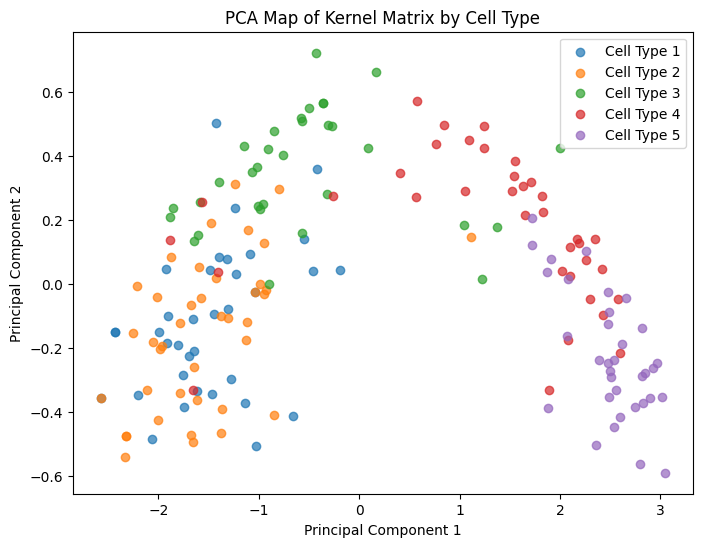

In [ ]:
X =np.genfromtxt("/content/Cheow_expression.csv", delimiter=",")
X_normalized = normalize(X, norm='l2')
y=np.genfromtxt("/content/Cheow_methylation.csv", delimiter=",")
y_normalized = normalize(y, norm='l2')

cellTypes_X=np.loadtxt("/content/scGEM_typeExpression.txt")
cellTypes_y=np.loadtxt("/content/scGEM_typeMethylation.txt")

gamma_x = calculate_gamma(X_normalized)
gamma_y = calculate_gamma(y_normalized)

kernel_X= rbf_kernel(X_normalized,gamma_x)
transformer = KernelCenterer().fit(kernel_X)
kernel_X = transformer.transform(kernel_X)

kernel_y= rbf_kernel(y_normalized,gamma_y)
transformer = KernelCenterer().fit(kernel_y)
kernel_y = transformer.transform(kernel_y)

plot_pca_map(kernel_X,cellTypes_X)
plot_pca_map(kernel_y,cellTypes_X)

In [ ]:
# Make sure to move tensors to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
set_seed(50)
K1 = torch.tensor(kernel_X, dtype=torch.float32, requires_grad=False).to(device)
K2 = torch.tensor(kernel_y, dtype=torch.float32, requires_grad=False).to(device)

mapped_K1_numpy,mapped_K2_numpy,accuracy,mean_fracs= optimize_alignment(K1, K2, cellTypes_X, cellTypes_y, device,p=5,knn=10, lambda_topo_values=[1], lambda_reg_values=[1e-8], iterations=7000,lr_rate=1e-3)


Random seed set as 50
Starting optimization with p: 5, lambda_topo: 1, lambda_reg: 1e-08
Random seed set as 50
Step: 0, Loss: 0.024660371243953705, Learning Rate _ a: 0.001,Learning Rate _ b: 0.001
Average FOSCTTM score for this alignment with X onto Y is:  0.21992167437082688
Label Transfer Accuracy: 0.4689265536723164
OT Loss: 0.02465873770415783
Graph Loss: 163.3726348876953
Orthogonal Loss: 4.3119197448704405e-12


Step: 1000, Loss: 0.012120626866817474, Learning Rate _ a: 0.00025,Learning Rate _ b: 0.00025
Average FOSCTTM score for this alignment with X onto Y is:  0.1974993579866461
Label Transfer Accuracy: 0.6610169491525424
OT Loss: 0.012090313248336315
Graph Loss: 158.38487243652344
Orthogonal Loss: 2.8729300538543612e-05


Step: 2000, Loss: 0.006069575436413288, Learning Rate _ a: 0.00025,Learning Rate _ b: 0.00025
Average FOSCTTM score for this alignment with X onto Y is:  0.19218669748330763
Label Transfer Accuracy: 0.7062146892655368
OT Loss: 0.0060606300830841064
Graph Lo

<ipython-input-53-5efb4ee5b35e>:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


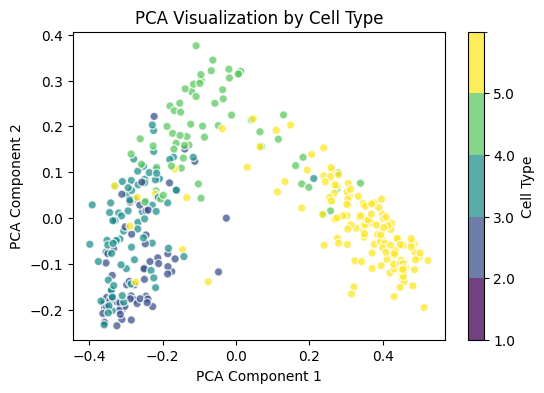

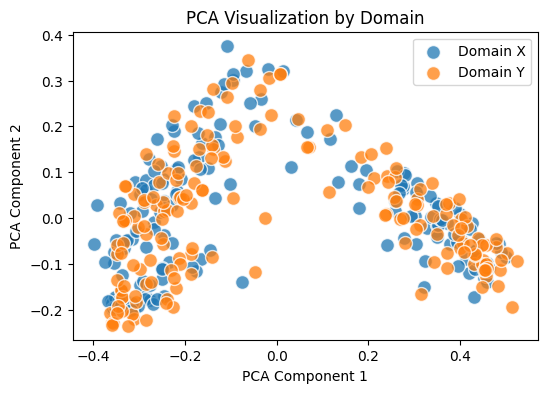

In [ ]:

# Example usage:
visualize_by_cell_type(mapped_K1_numpy, mapped_K2_numpy, cellTypes_X, cellTypes_y)

# Example usage:
visualize_by_domain(mapped_K1_numpy, mapped_K2_numpy)


# Snare

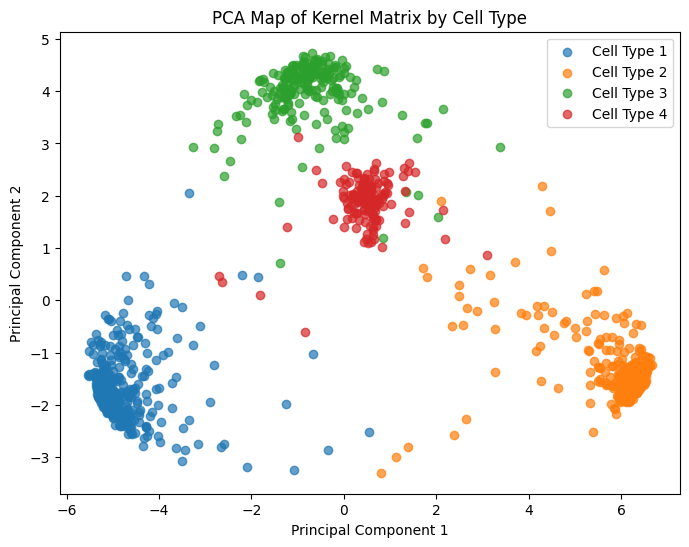

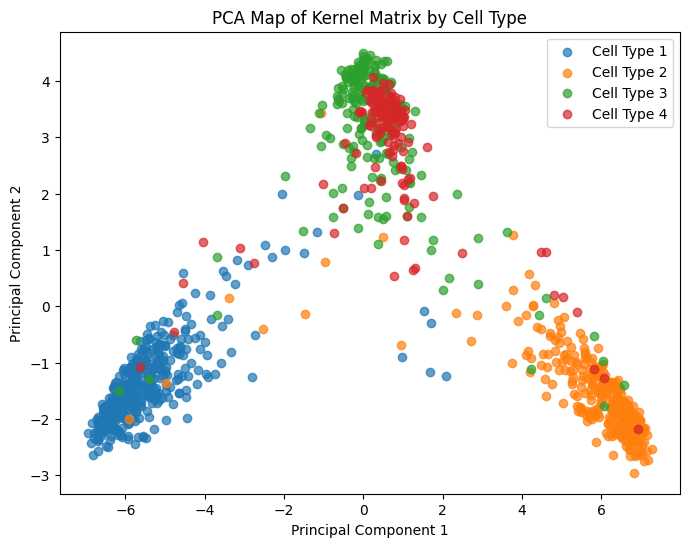

In [ ]:
X = np.load("/content/SNAREseq_rna_feat.npy")
y = np.load("/content/SNAREseq_atac_feat.npy")
cellTypes_X = np.loadtxt("/content/SNAREseq_rna_types.txt", dtype=str)
cellTypes_y = np.loadtxt("/content/SNAREseq_atac_types.txt", dtype=str)

X_normalized = normalize(X, norm='l2')
y_normalized = normalize(y, norm='l2')

gamma_x = calculate_gamma(X_normalized)
gamma_y = calculate_gamma(y_normalized)

kernel_X= rbf_kernel(X_normalized,gamma_x)
transformer = KernelCenterer().fit(kernel_X)
kernel_X = transformer.transform(kernel_X)

kernel_y= rbf_kernel(y_normalized,gamma_y)
transformer = KernelCenterer().fit(kernel_y)
kernel_y = transformer.transform(kernel_y)

plot_pca_map(kernel_X,cellTypes_X)
plot_pca_map(kernel_y,cellTypes_X)

In [ ]:
# Make sure to move tensors to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
set_seed(50)
K1 = torch.tensor(kernel_X, dtype=torch.float32, requires_grad=False).to(device)
K2 = torch.tensor(kernel_y, dtype=torch.float32, requires_grad=False).to(device)

mapped_K1_numpy,mapped_K2_numpy,accuracy,mean_fracs= optimize_alignment(K1, K2, cellTypes_X, cellTypes_y, device,p=5,knn=10, lambda_topo_values=[1], lambda_reg_values=[1e-5], iterations=3000,lr_rate=1e-3)


Random seed set as 50
Starting optimization with p: 5, lambda_topo: 1, lambda_reg: 1e-05
Random seed set as 50
Step: 0, Loss: 0.022893624380230904, Learning Rate _ a: 0.001,Learning Rate _ b: 0.001
Average FOSCTTM score for this alignment with X onto Y is:  0.1484634236761319
Label Transfer Accuracy: 0.9808978032473734
OT Loss: 0.016619790345430374
Graph Loss: 627.3833618164062
Orthogonal Loss: 3.7695801341497415e-12


Step: 1000, Loss: 0.019301658496260643, Learning Rate _ a: 3.125e-05,Learning Rate _ b: 3.125e-05
Average FOSCTTM score for this alignment with X onto Y is:  0.14649704792532975
Label Transfer Accuracy: 0.9885386819484241
OT Loss: 0.01307234913110733
Graph Loss: 620.4325561523438
Orthogonal Loss: 2.4985018171719275e-05


Step: 2000, Loss: 0.018582133576273918, Learning Rate _ a: 3.125e-05,Learning Rate _ b: 3.125e-05
Average FOSCTTM score for this alignment with X onto Y is:  0.14645002291898368
Label Transfer Accuracy: 0.9885386819484241
OT Loss: 0.012508057057857513
Gr

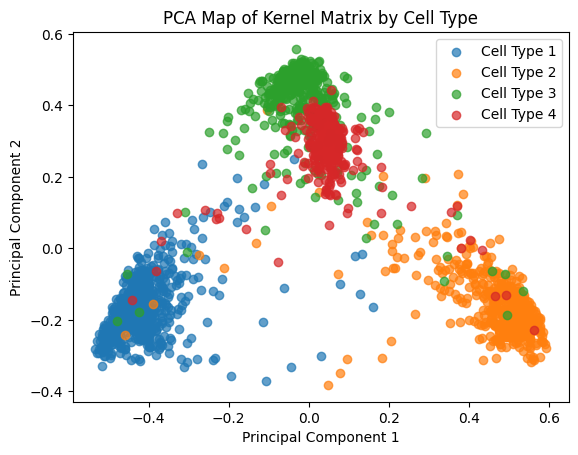

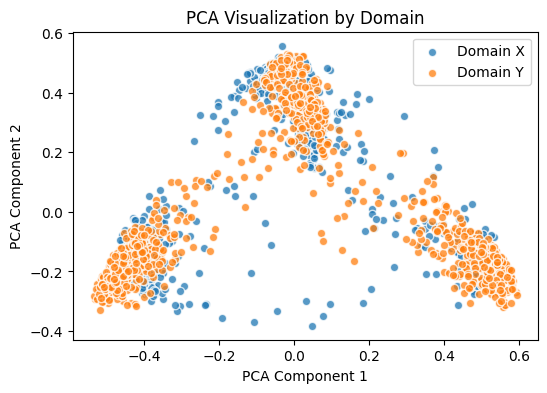

In [ ]:

# Example usage:
visualize_by_cell_type(mapped_K1_numpy, mapped_K2_numpy, cellTypes_X, cellTypes_y)

# Example usage:
visualize_by_domain(mapped_K1_numpy, mapped_K2_numpy)


# Sim-1

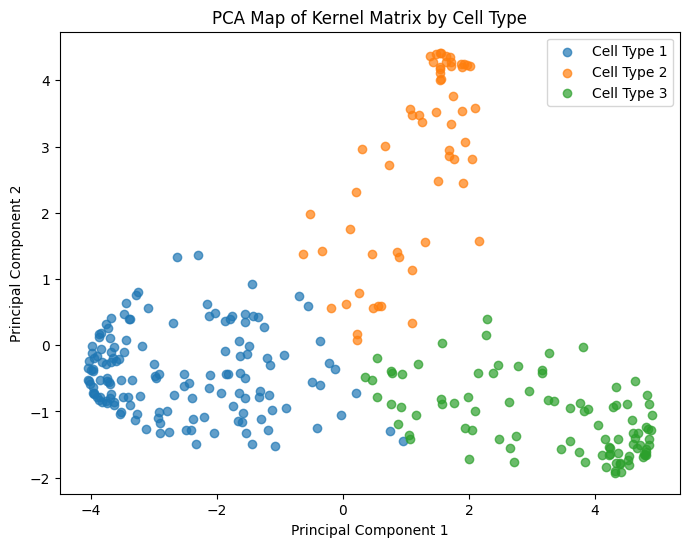

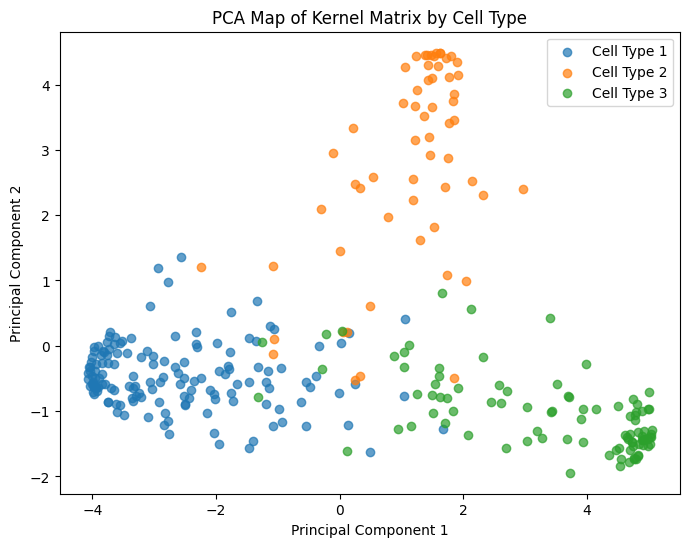

In [ ]:
X = np.loadtxt("/content/s1_mapped1.txt")
y = np.loadtxt("/content/s1_mapped2.txt")
cellTypes_X=np.loadtxt("/content/s1_label1.txt")
cellTypes_y=np.loadtxt("/content/s1_label2.txt")
X_normalized = zscore_normalization(X)
y_normalized = zscore_normalization(y)
gamma_x = calculate_gamma(X_normalized)
gamma_y = calculate_gamma(y_normalized)

kernel_X= rbf_kernel(X_normalized,gamma_x)
transformer = KernelCenterer().fit(kernel_X)
kernel_X = transformer.transform(kernel_X)

kernel_y= rbf_kernel(y_normalized,gamma_y)
transformer = KernelCenterer().fit(kernel_y)
kernel_y = transformer.transform(kernel_y)

plot_pca_map(kernel_X,cellTypes_X)
plot_pca_map(kernel_y,cellTypes_X)

In [ ]:
# Make sure to move tensors to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
set_seed(50)
K1 = torch.tensor(kernel_X, dtype=torch.float32, requires_grad=False).to(device)
K2 = torch.tensor(kernel_y, dtype=torch.float32, requires_grad=False).to(device)

mapped_K1_numpy,mapped_K2_numpy,accuracy,mean_fracs= optimize_alignment(K1, K2, cellTypes_X, cellTypes_y, device,p=5,knn=10, lambda_topo_values=[1e-3], lambda_reg_values=[1e-8], iterations=2000,lr_rate=1e-3)


Random seed set as 50
Starting optimization with p: 5, lambda_topo: 0.001, lambda_reg: 1e-08
Random seed set as 50
Step: 0, Loss: 0.01670108549296856, Learning Rate _ a: 0.001,Learning Rate _ b: 0.001
Average FOSCTTM score for this alignment with X onto Y is:  0.07833333333333332
Label Transfer Accuracy: 0.9666666666666667
OT Loss: 0.016696229577064514
Graph Loss: 485.5479431152344
Orthogonal Loss: 1.529920179259292e-12


Step: 1000, Loss: 0.0018724079709500074, Learning Rate _ a: 0.0005,Learning Rate _ b: 0.0005
Average FOSCTTM score for this alignment with X onto Y is:  0.07044035674470456
Label Transfer Accuracy: 0.97
OT Loss: 0.0017085797153413296
Graph Loss: 416.7175598144531
Orthogonal Loss: 0.15966106951236725


Step: 2000, Loss: 0.001236321055330336, Learning Rate _ a: 0.0005,Learning Rate _ b: 0.0005
Average FOSCTTM score for this alignment with X onto Y is:  0.07096432552954292
Label Transfer Accuracy: 0.97
OT Loss: 0.0011389097198843956
Graph Loss: 385.0433349609375
Orthogon

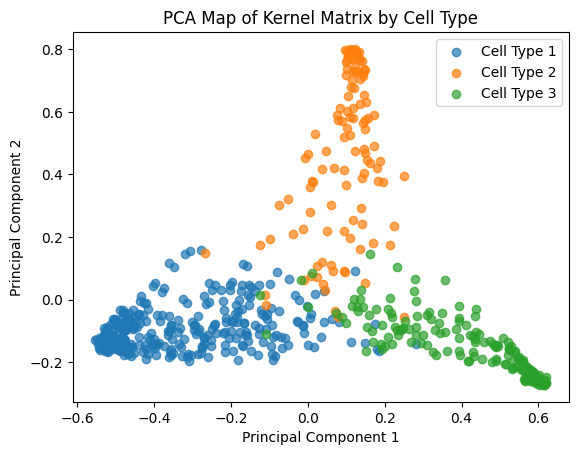

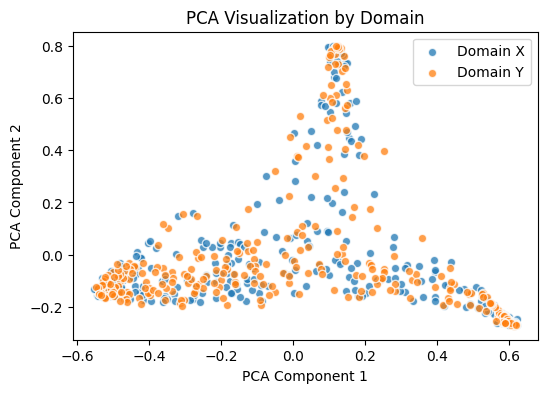

In [ ]:

# Example usage:
visualize_by_cell_type(mapped_K1_numpy, mapped_K2_numpy, cellTypes_X, cellTypes_y)

# Example usage:
visualize_by_domain(mapped_K1_numpy, mapped_K2_numpy)


# Sim-2

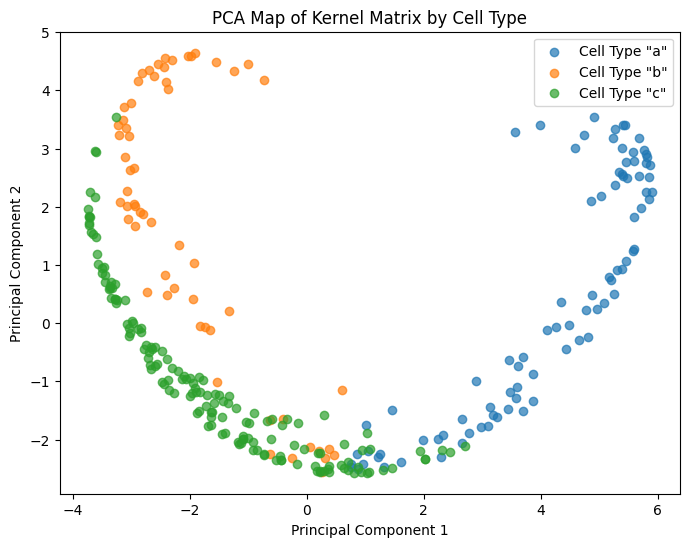

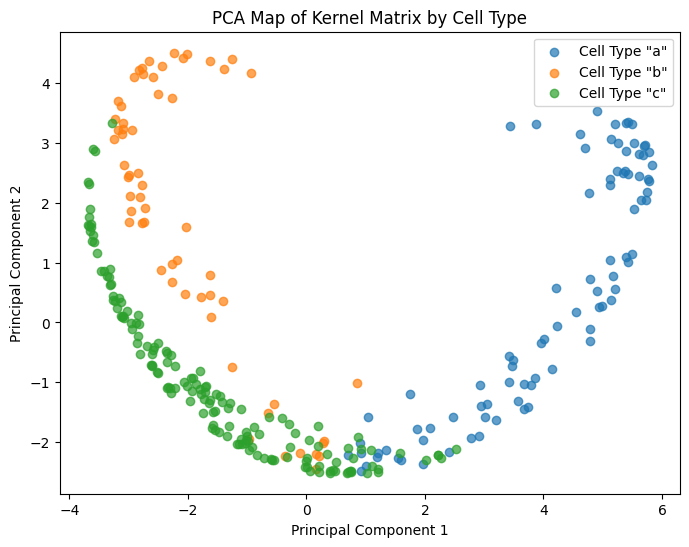

In [ ]:
X = np.loadtxt("/content/s2_mapped1.txt")
y = np.loadtxt("/content/s2_mapped2.txt")

cellTypes_X=np.loadtxt("/content/s2_label1.txt", dtype=str)
cellTypes_y=np.loadtxt("/content/s2_label2.txt", dtype=str)
X_normalized = zscore_normalization(X)
y_normalized = zscore_normalization(y)
gamma_x = calculate_gamma(X_normalized)
gamma_y = calculate_gamma(y_normalized)

kernel_X= rbf_kernel(X_normalized,gamma_x)
transformer = KernelCenterer().fit(kernel_X)
kernel_X = transformer.transform(kernel_X)

kernel_y= rbf_kernel(y_normalized,gamma_y)
transformer = KernelCenterer().fit(kernel_y)
kernel_y = transformer.transform(kernel_y)

plot_pca_map_1(kernel_X,cellTypes_X)
plot_pca_map_1(kernel_y,cellTypes_X)

In [ ]:
# Make sure to move tensors to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
set_seed(50)
K1 = torch.tensor(kernel_X, dtype=torch.float32, requires_grad=False).to(device)
K2 = torch.tensor(kernel_y, dtype=torch.float32, requires_grad=False).to(device)

mapped_K1_numpy,mapped_K2_numpy,accuracy,mean_fracs= optimize_alignment(K1, K2, cellTypes_X, cellTypes_y, device,p=5,knn=10, lambda_topo_values=[1], lambda_reg_values=[1e-8], iterations=2000,lr_rate=1e-3)


Random seed set as 50
Starting optimization with p: 5, lambda_topo: 1, lambda_reg: 1e-08
Random seed set as 50
Step: 0, Loss: 0.002284575253725052, Learning Rate _ a: 0.001,Learning Rate _ b: 0.001
Average FOSCTTM score for this alignment with X onto Y is:  0.006465997770345597
Label Transfer Accuracy: 0.99
OT Loss: 0.0022816238924860954
Graph Loss: 295.142578125
Orthogonal Loss: 2.1247591359963014e-12


Step: 1000, Loss: 0.0014780770288780332, Learning Rate _ a: 0.000125,Learning Rate _ b: 0.000125
Average FOSCTTM score for this alignment with X onto Y is:  0.006248606465997769
Label Transfer Accuracy: 0.9933333333333333
OT Loss: 0.0014729858376085758
Graph Loss: 294.70989990234375
Orthogonal Loss: 2.1440810087369755e-06


Step: 2000, Loss: 0.0014224267797544599, Learning Rate _ a: 0.000125,Learning Rate _ b: 0.000125
Average FOSCTTM score for this alignment with X onto Y is:  0.0062095875139353395
Label Transfer Accuracy: 0.99
OT Loss: 0.0014173859963193536
Graph Loss: 294.0474548339

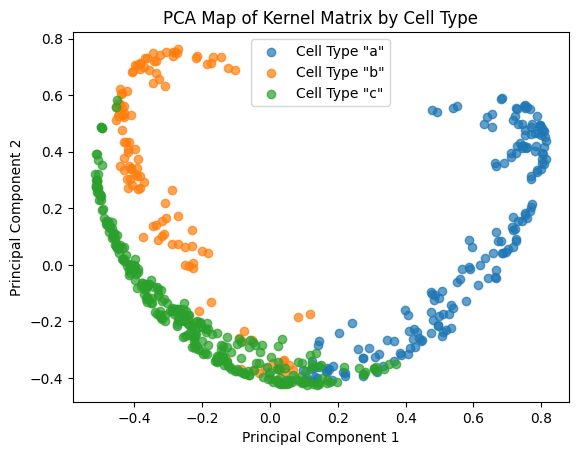

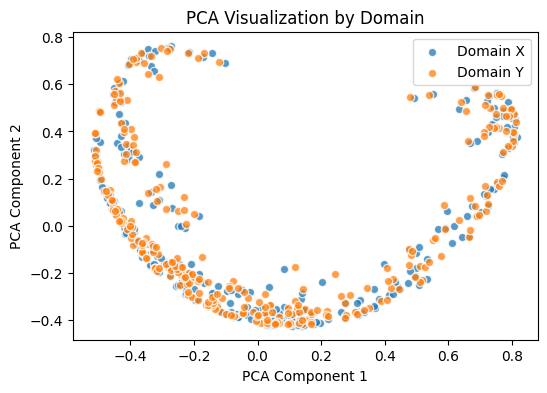

In [ ]:

# Example usage:
visualize_by_cell_type_1(mapped_K1_numpy, mapped_K2_numpy, cellTypes_X, cellTypes_y)

# Example usage:
visualize_by_domain(mapped_K1_numpy, mapped_K2_numpy)


# Sim-3

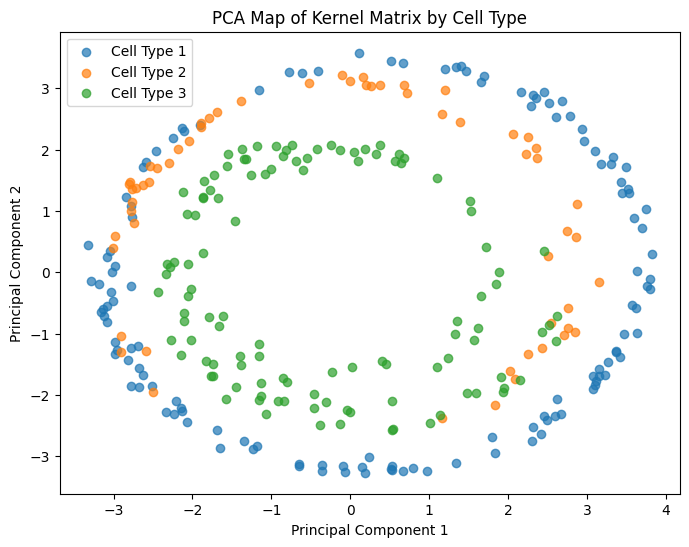

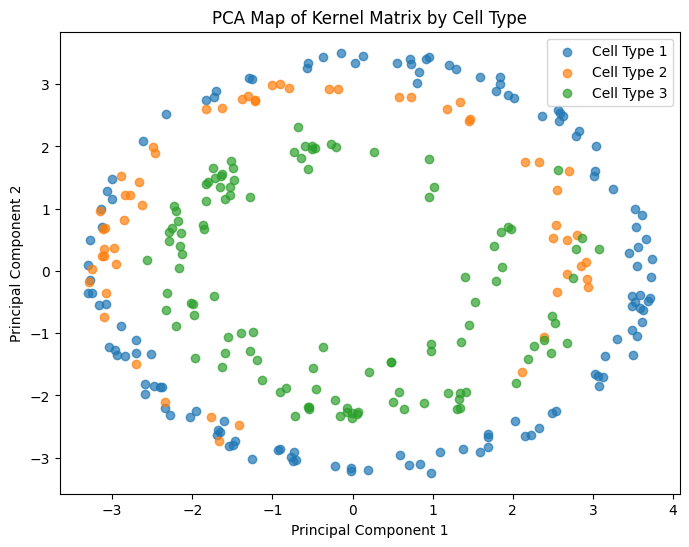

In [ ]:
X = np.loadtxt("/content/s3_mapped1.txt")
y = np.loadtxt("/content/s3_mapped2.txt")

cellTypes_X=np.loadtxt("/content/s3_label1.txt", dtype=str)
cellTypes_y=np.loadtxt("/content/s3_label2.txt", dtype=str)
X_normalized = zscore_normalization(X)
y_normalized = zscore_normalization(y)
gamma_x = calculate_gamma(X_normalized)
gamma_y = calculate_gamma(y_normalized)

kernel_X= rbf_kernel(X_normalized,gamma_x)
transformer = KernelCenterer().fit(kernel_X)
kernel_X = transformer.transform(kernel_X)

kernel_y= rbf_kernel(y_normalized,gamma_y)
transformer = KernelCenterer().fit(kernel_y)
kernel_y = transformer.transform(kernel_y)

plot_pca_map_1(kernel_X,cellTypes_X)
plot_pca_map_1(kernel_y,cellTypes_X)

In [ ]:
# Make sure to move tensors to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
set_seed(50)
K1 = torch.tensor(kernel_X, dtype=torch.float32, requires_grad=False).to(device)
K2 = torch.tensor(kernel_y, dtype=torch.float32, requires_grad=False).to(device)

mapped_K1_numpy,mapped_K2_numpy,accuracy,mean_fracs= optimize_alignment(K1, K2, cellTypes_X, cellTypes_y, device,p=5,knn=10, lambda_topo_values=[1], lambda_reg_values=[1e-8], iterations=3000,lr_rate=1e-3)


Random seed set as 50
Starting optimization with p: 5, lambda_topo: 1, lambda_reg: 1e-08
Random seed set as 50
Step: 0, Loss: 0.03509647399187088, Learning Rate _ a: 0.001,Learning Rate _ b: 0.001
Average FOSCTTM score for this alignment with X onto Y is:  0.05487736900780379
Label Transfer Accuracy: 0.9266666666666666
OT Loss: 0.03509451821446419
Graph Loss: 195.4313507080078
Orthogonal Loss: 2.579309162087373e-12


Step: 1000, Loss: 0.0050070215947926044, Learning Rate _ a: 0.00025,Learning Rate _ b: 0.00025
Average FOSCTTM score for this alignment with X onto Y is:  0.05971014492753623
Label Transfer Accuracy: 0.9266666666666666
OT Loss: 0.005001783836632967
Graph Loss: 200.47882080078125
Orthogonal Loss: 3.2330256090062903e-06


Step: 2000, Loss: 0.0015915643889456987, Learning Rate _ a: 9.765625e-07,Learning Rate _ b: 9.765625e-07
Average FOSCTTM score for this alignment with X onto Y is:  0.009119286510590859
Label Transfer Accuracy: 0.9433333333333334
OT Loss: 0.0015880279242992

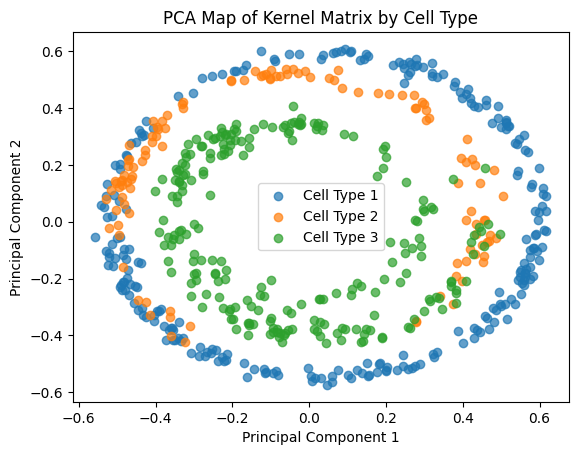

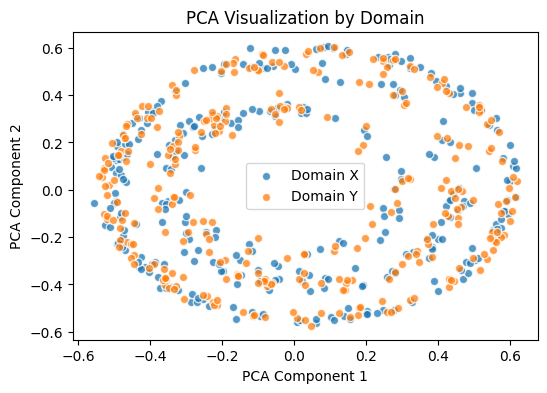

In [ ]:

# Example usage:
visualize_by_cell_type(mapped_K1_numpy, mapped_K2_numpy, cellTypes_X, cellTypes_y)

# Example usage:
visualize_by_domain(mapped_K1_numpy, mapped_K2_numpy)


# Real-Sim

Dimensions of input datasets are:  X=  (5000, 50)  y=  (5000, 500)


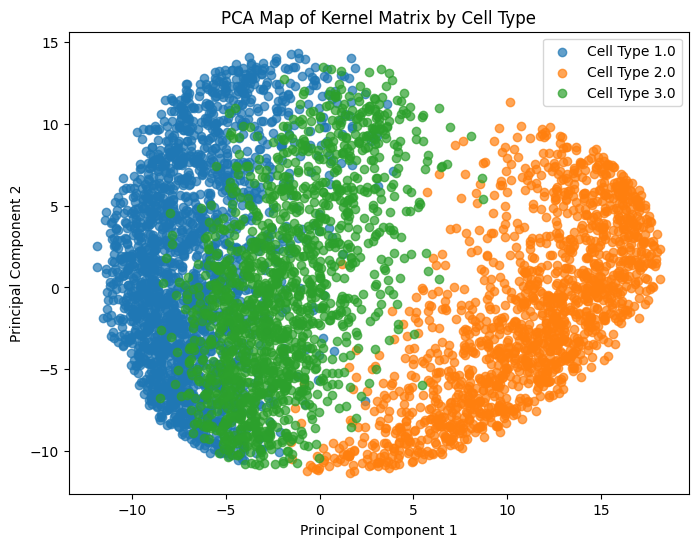

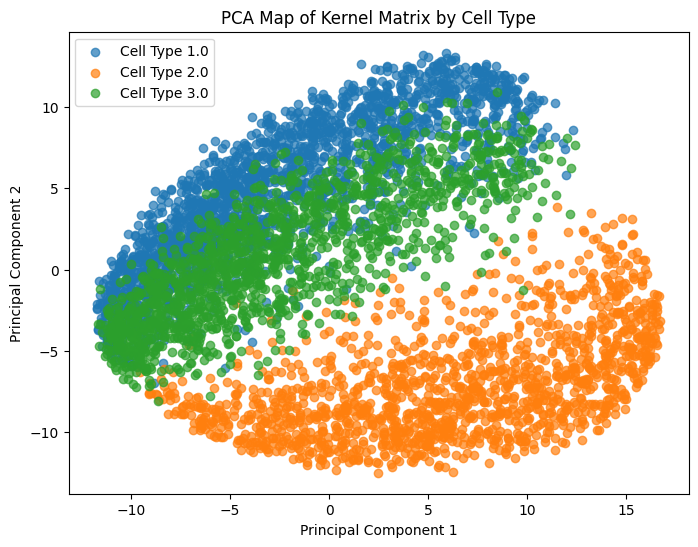

In [ ]:
X=np.load("/content/splatter_X.npy")
y=np.load("/content/splatter_y.npy")
print("Dimensions of input datasets are: ", "X= ", X.shape, " y= ", y.shape)
cellTypes_X=np.genfromtxt("/content/splatter_labels.csv")
cellTypes_y=np.genfromtxt("/content/splatter_labels.csv")

X_normalized = zscore_normalization(X)
y_normalized = zscore_normalization(y)
gamma_x = calculate_gamma(X_normalized)
gamma_y = calculate_gamma(y_normalized)

kernel_X= rbf_kernel(X_normalized,gamma_x)
transformer = KernelCenterer().fit(kernel_X)
kernel_X = transformer.transform(kernel_X)

kernel_y= rbf_kernel(y_normalized,gamma_y)
transformer = KernelCenterer().fit(kernel_y)
kernel_y = transformer.transform(kernel_y)

plot_pca_map_1(kernel_X,cellTypes_X)
plot_pca_map_1(kernel_y,cellTypes_X)

In [ ]:
# Make sure to move tensors to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
set_seed(50)
K1 = torch.tensor(kernel_X, dtype=torch.float32, requires_grad=False).to(device)
K2 = torch.tensor(kernel_y, dtype=torch.float32, requires_grad=False).to(device)

mapped_K1_numpy,mapped_K2_numpy,accuracy,mean_fracs= optimize_alignment(K1, K2, cellTypes_X, cellTypes_y, device,p=5,knn=15, lambda_topo_values=[1e-3], lambda_reg_values=[1e-7], iterations=800,lr_rate=1e-4)


Random seed set as 50
Starting optimization with p: 5, lambda_topo: 0.001, lambda_reg: 1e-07
Random seed set as 50
Step: 800, Loss: 0.0006594299920834601, Learning Rate _ a: 5e-05,Learning Rate _ b: 5e-05
Average FOSCTTM score for this alignment with X onto Y is:  6.40128025605121e-07
Label Transfer Accuracy: 0.9976
OT Loss: 5.99924023845233e-05
Graph Loss: 5594.203125
Orthogonal Loss: 0.0400172583758831




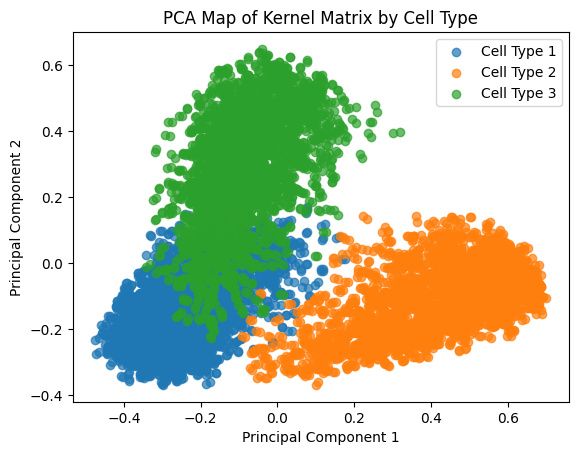

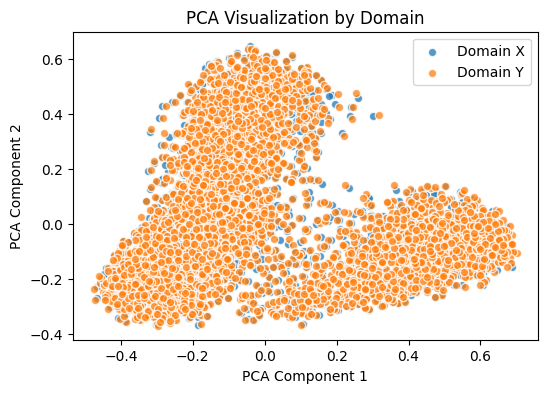

In [ ]:

# Example usage:
visualize_by_cell_type(mapped_K1_numpy, mapped_K2_numpy, cellTypes_X, cellTypes_y)

# Example usage:
visualize_by_domain(mapped_K1_numpy, mapped_K2_numpy)
